Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing

In [2]:
# Load the data
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Exploration

In [3]:
# checking for null values 
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# checking for duplicate values
company_data[company_data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


As we show that feature are not in same scale.The mean of population is 264.84 while the mean of Advertising is 6.635 so we should bring it in a same scale by standardize it.

In [7]:
# convert sales data in catogerical as mention in question
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

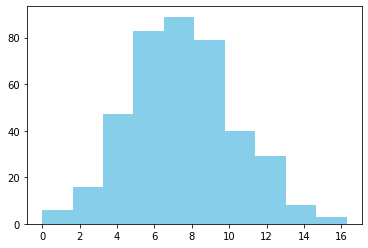

In [8]:
plt.hist('Sales',data=company_data ,color='skyblue')
plt.show()

As we show that Sales data looks like normally distributed so we can take mean or median as throushold value to make two or three catogeric.

In [9]:
# converting sales in catogerical
data=company_data.copy()
data['Sales_cat'] = pd.cut(x = data['Sales'], bins = [0,7.5,17], labels=['Low','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [10]:
data['Sales_cat'].value_counts()

Low     201
High    199
Name: Sales_cat, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [12]:
# List of Numerical Variables 
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [13]:
# categorical variables 
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [14]:
# check for cardinality in categorical variables
for var in categorical_features:
    print(var, ' contains ', len(data[var].unique()), ' labels')

ShelveLoc  contains  3  labels
Urban  contains  2  labels
US  contains  2  labels


As we show that labels are not must large so we shoud use dummies encoder  to convert it in numeric

## Exploratory Data Analysis

In [15]:
# checking for correlation
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Sales'),
  Text(1.5, 0, 'CompPrice'),
  Text(2.5, 0, 'Income'),
  Text(3.5, 0, 'Advertising'),
  Text(4.5, 0, 'Population'),
  Text(5.5, 0, 'Price'),
  Text(6.5, 0, 'Age'),
  Text(7.5, 0, 'Education')])

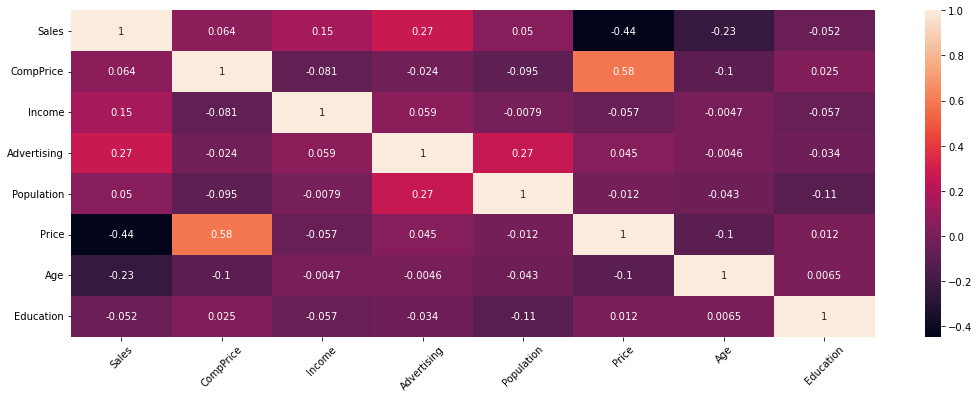

In [16]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

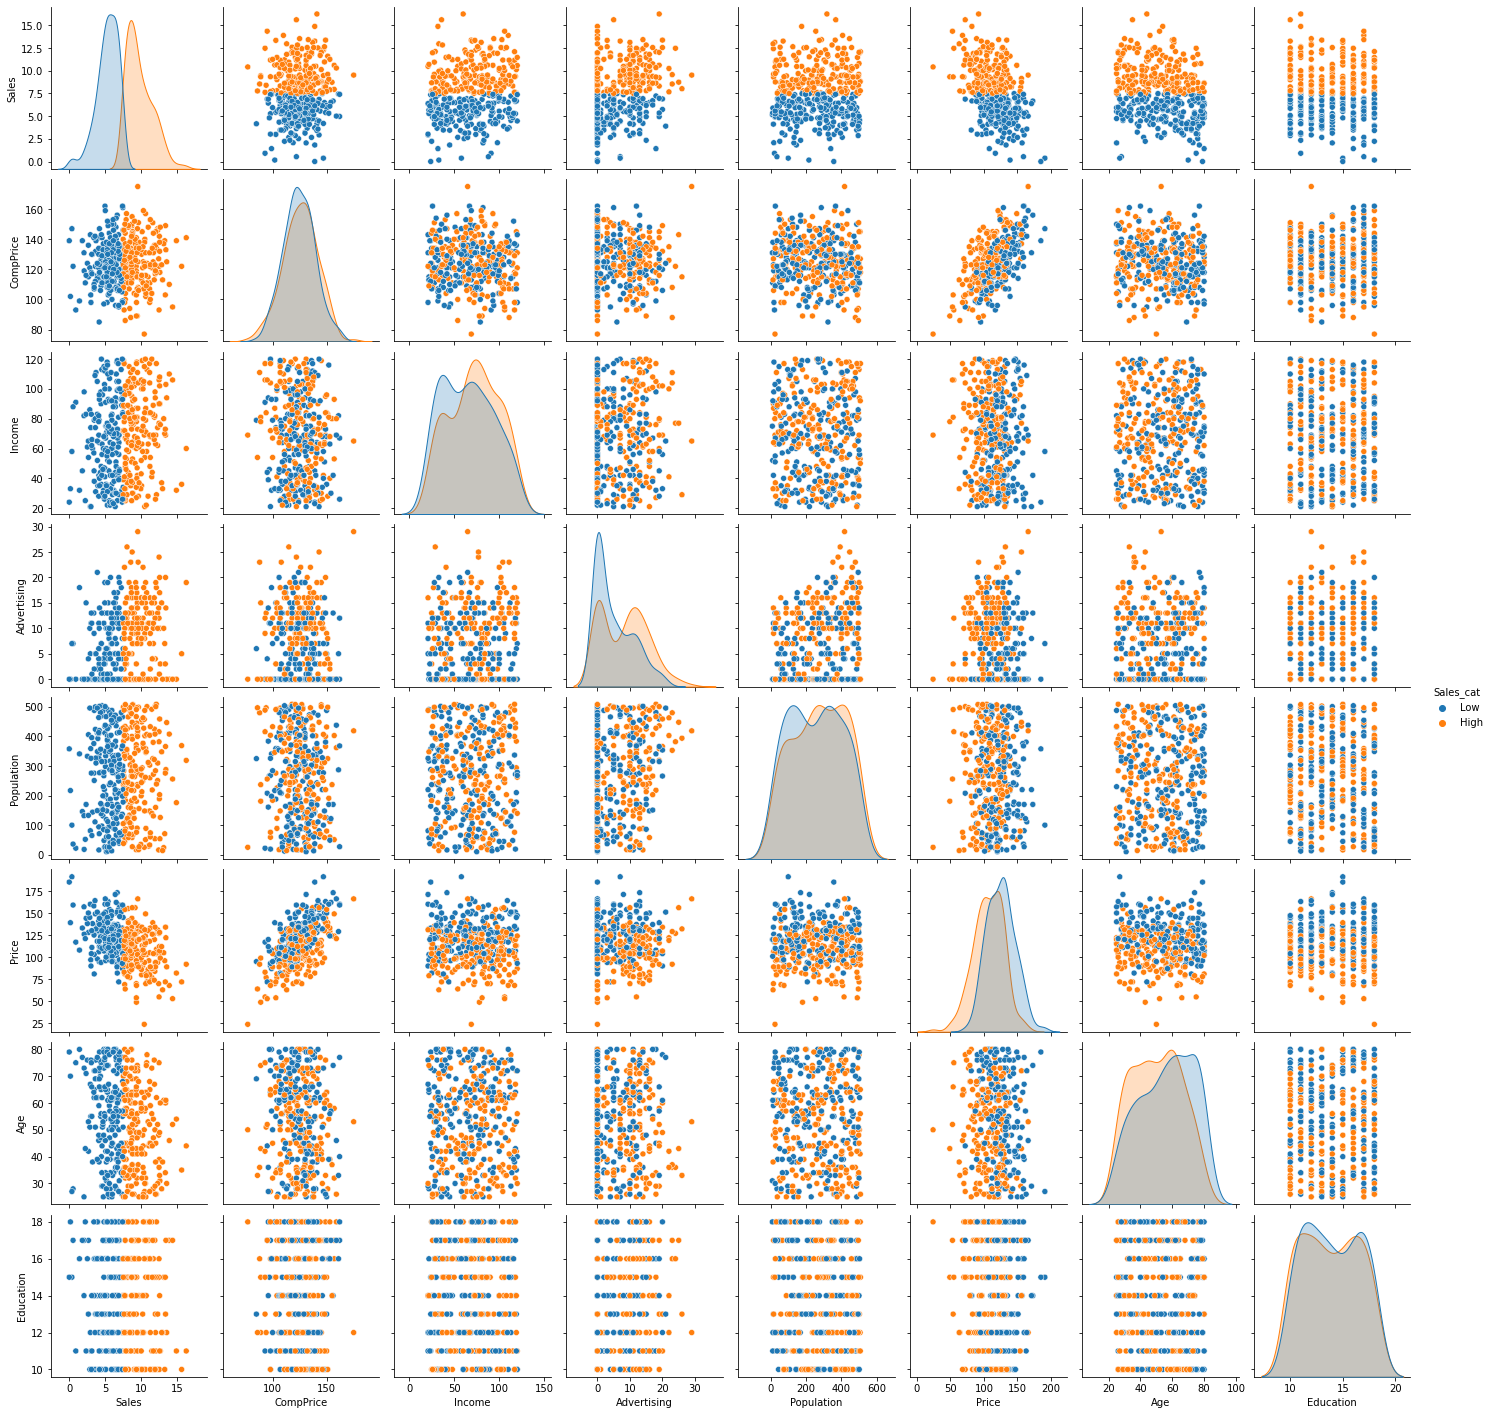

In [17]:
# pair plot data 
sns.pairplot(data=data,hue='Sales_cat')

By visualization of heatmap and pair plot we say that their are no correlation between features.

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


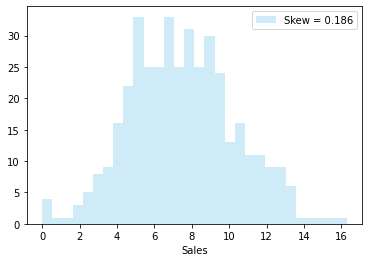

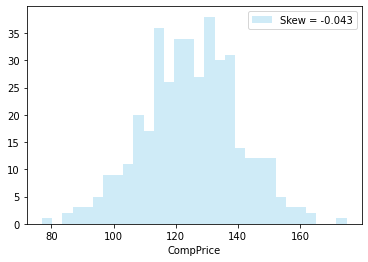

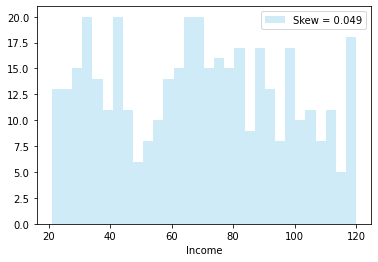

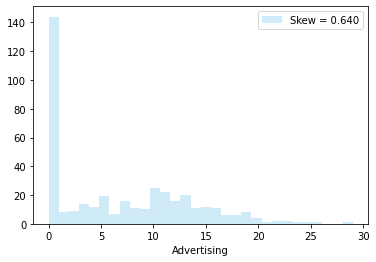

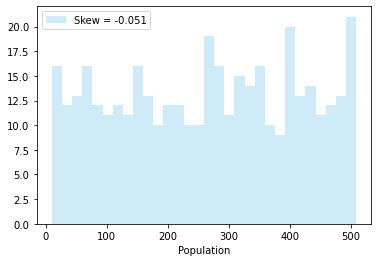

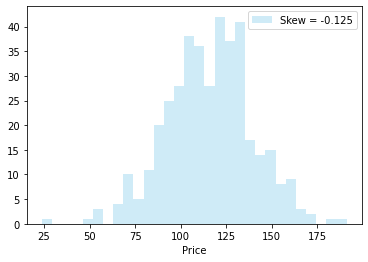

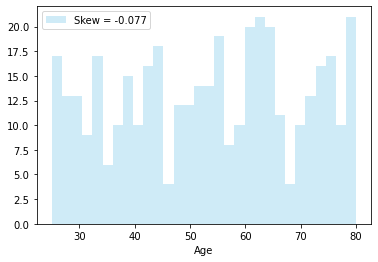

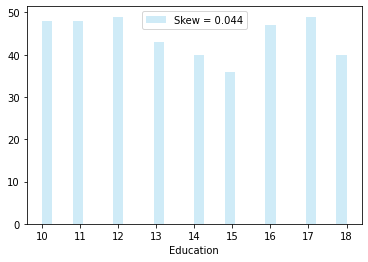

In [18]:
# Histogram visualization of numeric variables
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False,color='skyblue', label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed.Advertising have high skew so we shoud check for outliers by ploting boxplot.

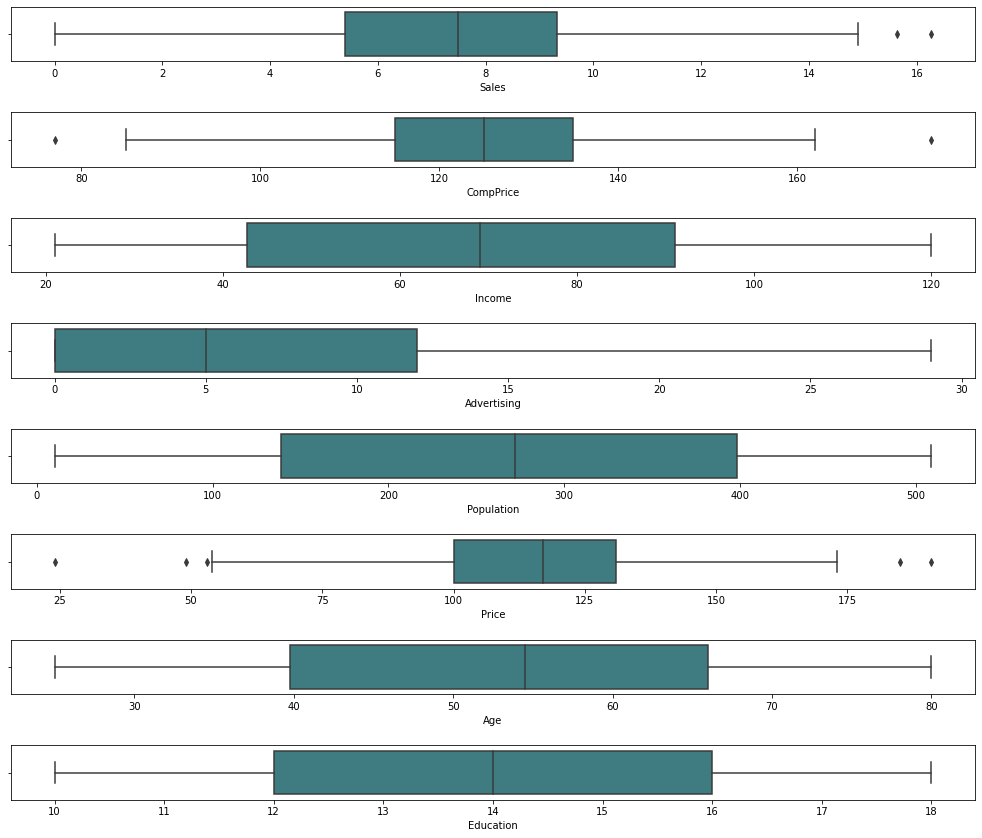

In [19]:
# Checking for outliers
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=data,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=data,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

We observe that only 2,3 outliers are present in price and campPrice which we should remove in data pre-processing

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\si

<AxesSubplot:xlabel='Sales_cat', ylabel='count'>

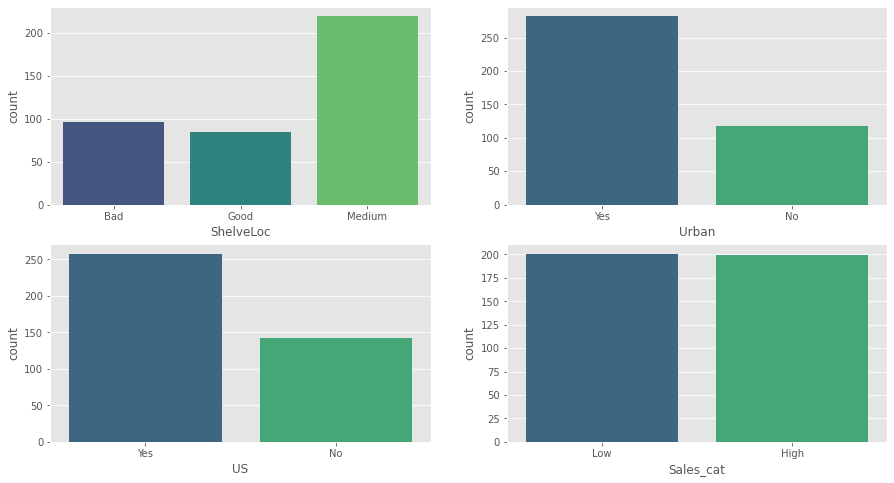

In [20]:
# countplot for visualization for categorical data
plt.style.use("ggplot")
fig, ax =plt.subplots(2,2, figsize=(15,8)) 
sns.countplot(data["ShelveLoc"], palette="viridis", ax=ax[0,0])
sns.countplot(data["Urban"], palette="viridis", ax=ax[0,1])
sns.countplot(data["US"], palette="viridis", ax=ax[1,0])
sns.countplot(data["Sales_cat"], palette="viridis", ax=ax[1,1])

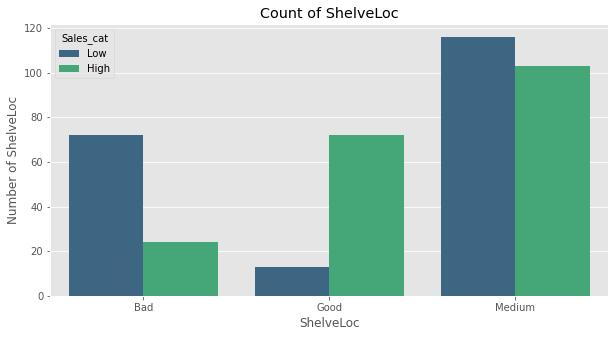

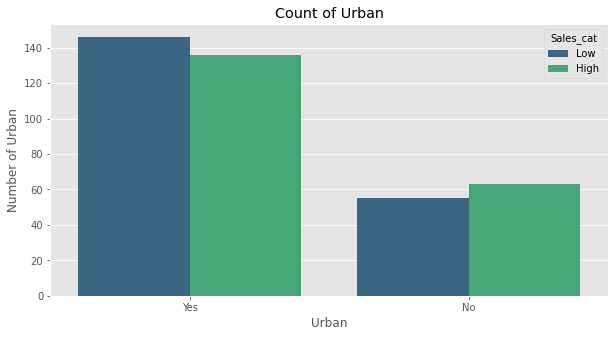

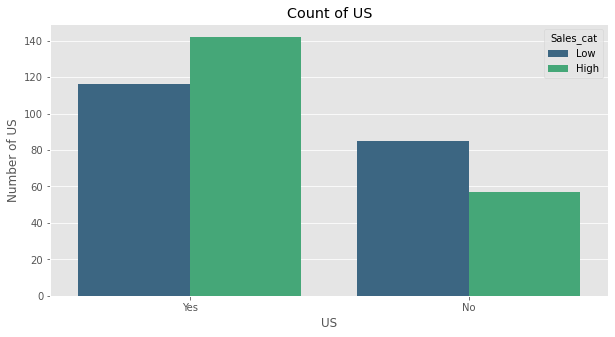

In [21]:
# visualization of categorical data w.r.t. Sales_cat
for var,column in enumerate(categorical_features):
    plt.figure(figsize=(10, 5))
    unique = data[column].value_counts(ascending=True);   
    plt.title("Count of "+ column)
    sns.countplot(data=data, x=column,palette = "viridis",hue='Sales_cat')
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)

By visualization we show that the quality of shelving location for the car seats at each sit has  counts high value of medium quality. Most of stores are located in US and most of stores are in urban area.  

#### Checking for imblance and balanced dataset

In [22]:
data['Sales_cat'].value_counts()

Low     201
High    199
Name: Sales_cat, dtype: int64

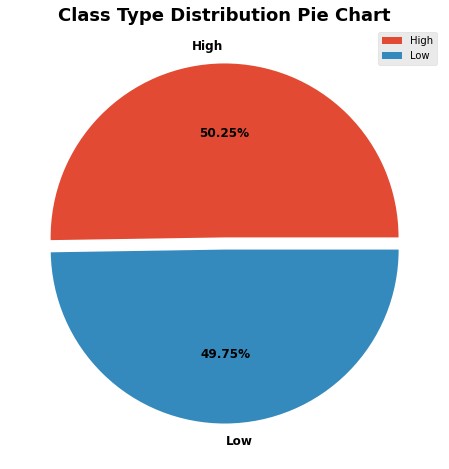

In [23]:
# pie plot for Sales_cat
plt.figure(figsize = (12,8))
plt.pie(data['Sales_cat'].value_counts(),labels=data.Sales_cat.unique(),explode = [0.04,0.03],autopct= '%.2f%%',
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

We have blanced dataset.

## Data pre-processing

In [24]:
# Droping of unwanted columns
df= data.copy()
df.drop('Sales',axis=1, inplace =True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [25]:
# use dummeis encoder for categorical features except target features 
df = pd.get_dummies(df.iloc[:,:-1])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [26]:
# rename of column and apply label encoder to target variables
df['Sales'] = data.Sales_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Sales"])
df["Sales"]=le.transform(df["Sales"])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [27]:
# removing outliers
df1=df.copy()
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [28]:
for i in range(5):
    lower,uper=outlierDetect(df1['CompPrice'])
    df1=df1[(df1['CompPrice']<uper )&(df1['CompPrice']>lower)]
    lower,uper=outlierDetect(df1['Price'])
    df1=df1[(df1['Price']<uper )&(df1['Price']>lower)]
    print(df1.shape)

(393, 15)
(391, 15)
(391, 15)
(391, 15)
(391, 15)


In [29]:
# Train_test Split
x = df1.drop('Sales',axis=1)
y = df1[['Sales']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((273, 14), (273, 1), (118, 14), (118, 1))

In [30]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)
x_test_std

array([[ 0.58668858,  0.380101  , -1.01876948, ...,  0.596927  ,
         1.34518542, -1.34518542],
       [ 0.02838816, -0.79204751, -0.58109424, ...,  0.596927  ,
        -0.74339194,  0.74339194],
       [-0.11118695,  0.86275039,  0.44014798, ...,  0.596927  ,
        -0.74339194,  0.74339194],
       ...,
       [ 1.2845641 , -1.72287133, -0.28931075, ..., -1.67524673,
        -0.74339194,  0.74339194],
       [ 0.37732592,  1.00065022,  0.58603972, ...,  0.596927  ,
        -0.74339194,  0.74339194],
       [ 1.70328942, -0.06807343,  1.89906543, ...,  0.596927  ,
        -0.74339194,  0.74339194]])

## Building Decision Tree Classifier using Entropy Criteria

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
k = [2,3,4,5,6,7,8] 
for n in k:
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth=n,max_leaf_nodes=10)
    model.fit(x_train_std,y_train)
    pred_test = model.predict(x_test_std)
    print('Test data Accuracy at max_depth=',n,'is :',accuracy_score(y_test,pred_test))
    pred_train = model.predict(x_train_std)
    print('Train data Accuracy at max_depth=',n,'is :',accuracy_score(y_train,pred_train))
    print()

Test data Accuracy at max_depth= 2 is : 0.6949152542372882
Train data Accuracy at max_depth= 2 is : 0.6886446886446886

Test data Accuracy at max_depth= 3 is : 0.7711864406779662
Train data Accuracy at max_depth= 3 is : 0.7728937728937729

Test data Accuracy at max_depth= 4 is : 0.8135593220338984
Train data Accuracy at max_depth= 4 is : 0.7912087912087912

Test data Accuracy at max_depth= 5 is : 0.8135593220338984
Train data Accuracy at max_depth= 5 is : 0.8315018315018315

Test data Accuracy at max_depth= 6 is : 0.8135593220338984
Train data Accuracy at max_depth= 6 is : 0.8315018315018315

Test data Accuracy at max_depth= 7 is : 0.8220338983050848
Train data Accuracy at max_depth= 7 is : 0.8315018315018315

Test data Accuracy at max_depth= 8 is : 0.7627118644067796
Train data Accuracy at max_depth= 8 is : 0.8241758241758241



As we show that our model test_accuracy and train_acuracy is almost same at max_depth 3. So we build model with max_depth 3.

In [32]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,max_leaf_nodes=10)
model_entropy.fit(x_train_std,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10)

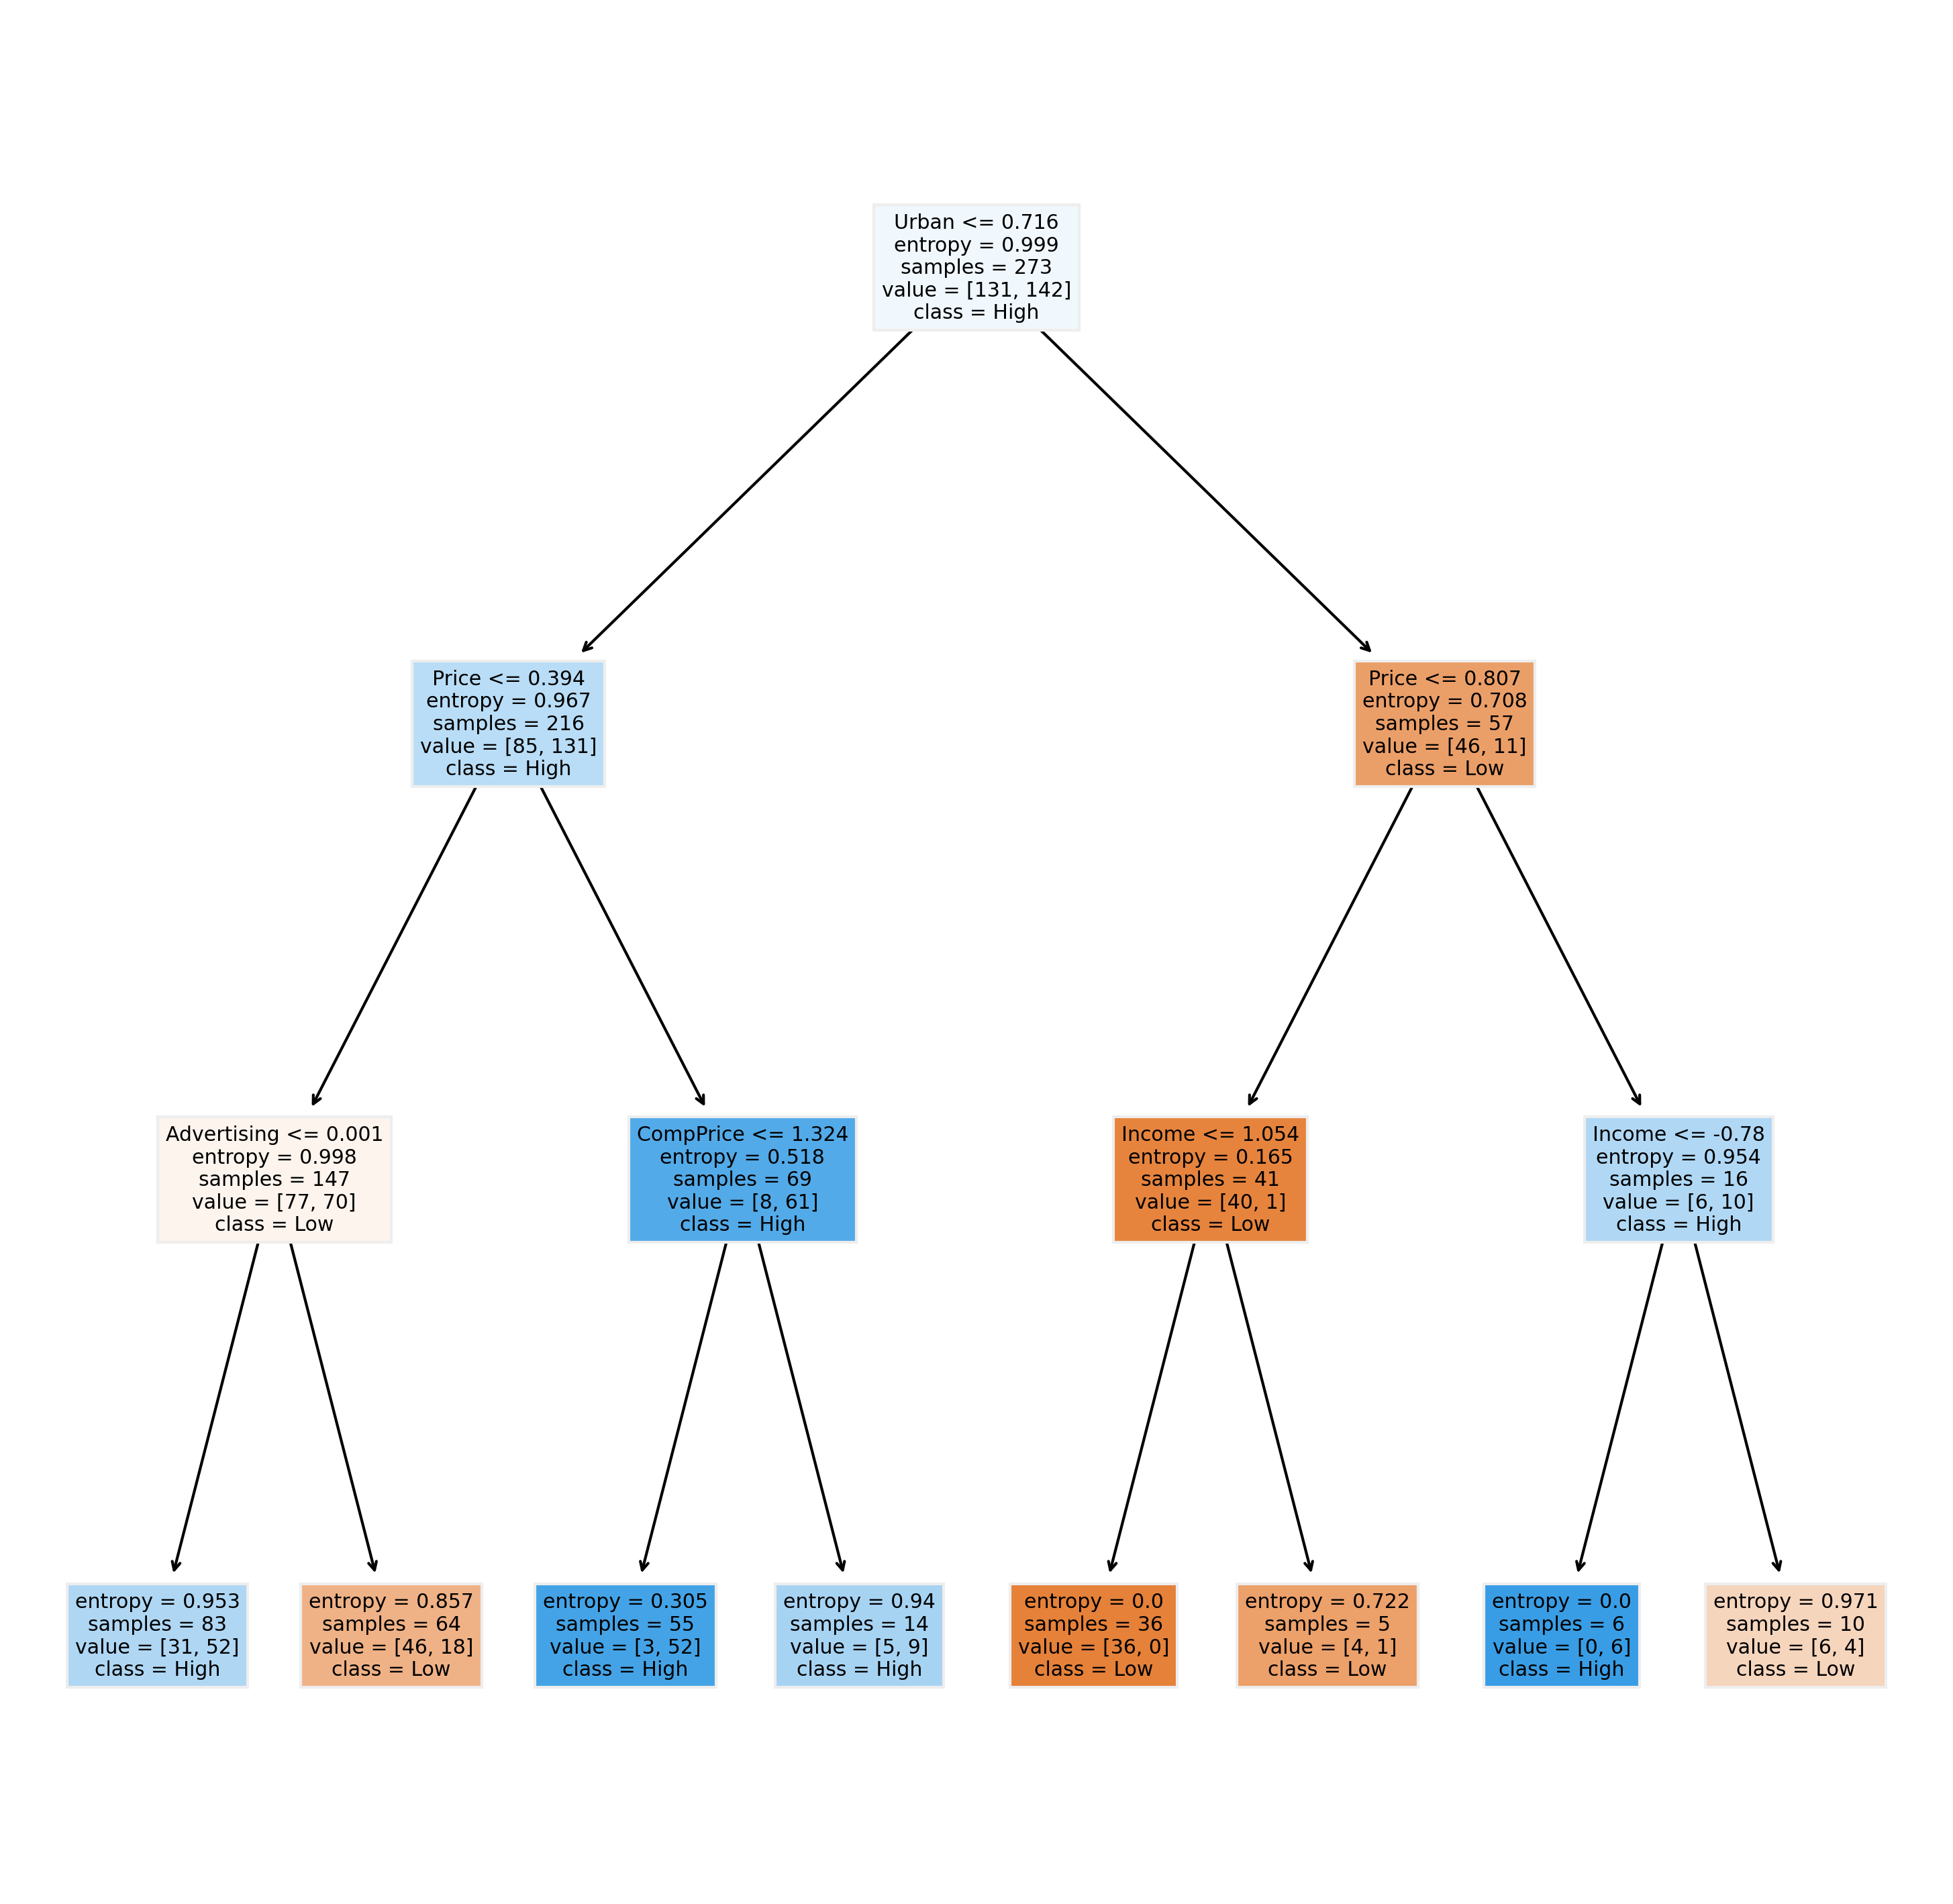

In [33]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True);

In [34]:
#Predicting on test data
preds = model.predict(x_test_std) 
pd.Series(preds).value_counts()

1    74
0    44
dtype: int64

In [35]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), preds)

col_0,0,1
Sales,,
0,39,23
1,5,51


In [36]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        62
           1       0.69      0.91      0.78        56

    accuracy                           0.76       118
   macro avg       0.79      0.77      0.76       118
weighted avg       0.79      0.76      0.76       118



In [37]:
# Accuracy 
np.mean(preds==y_test.squeeze())

0.7627118644067796

## Building Decision Tree Classifier (CART) using Gini Criteria

In [38]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3 ,max_leaf_nodes=10)
model_CART.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

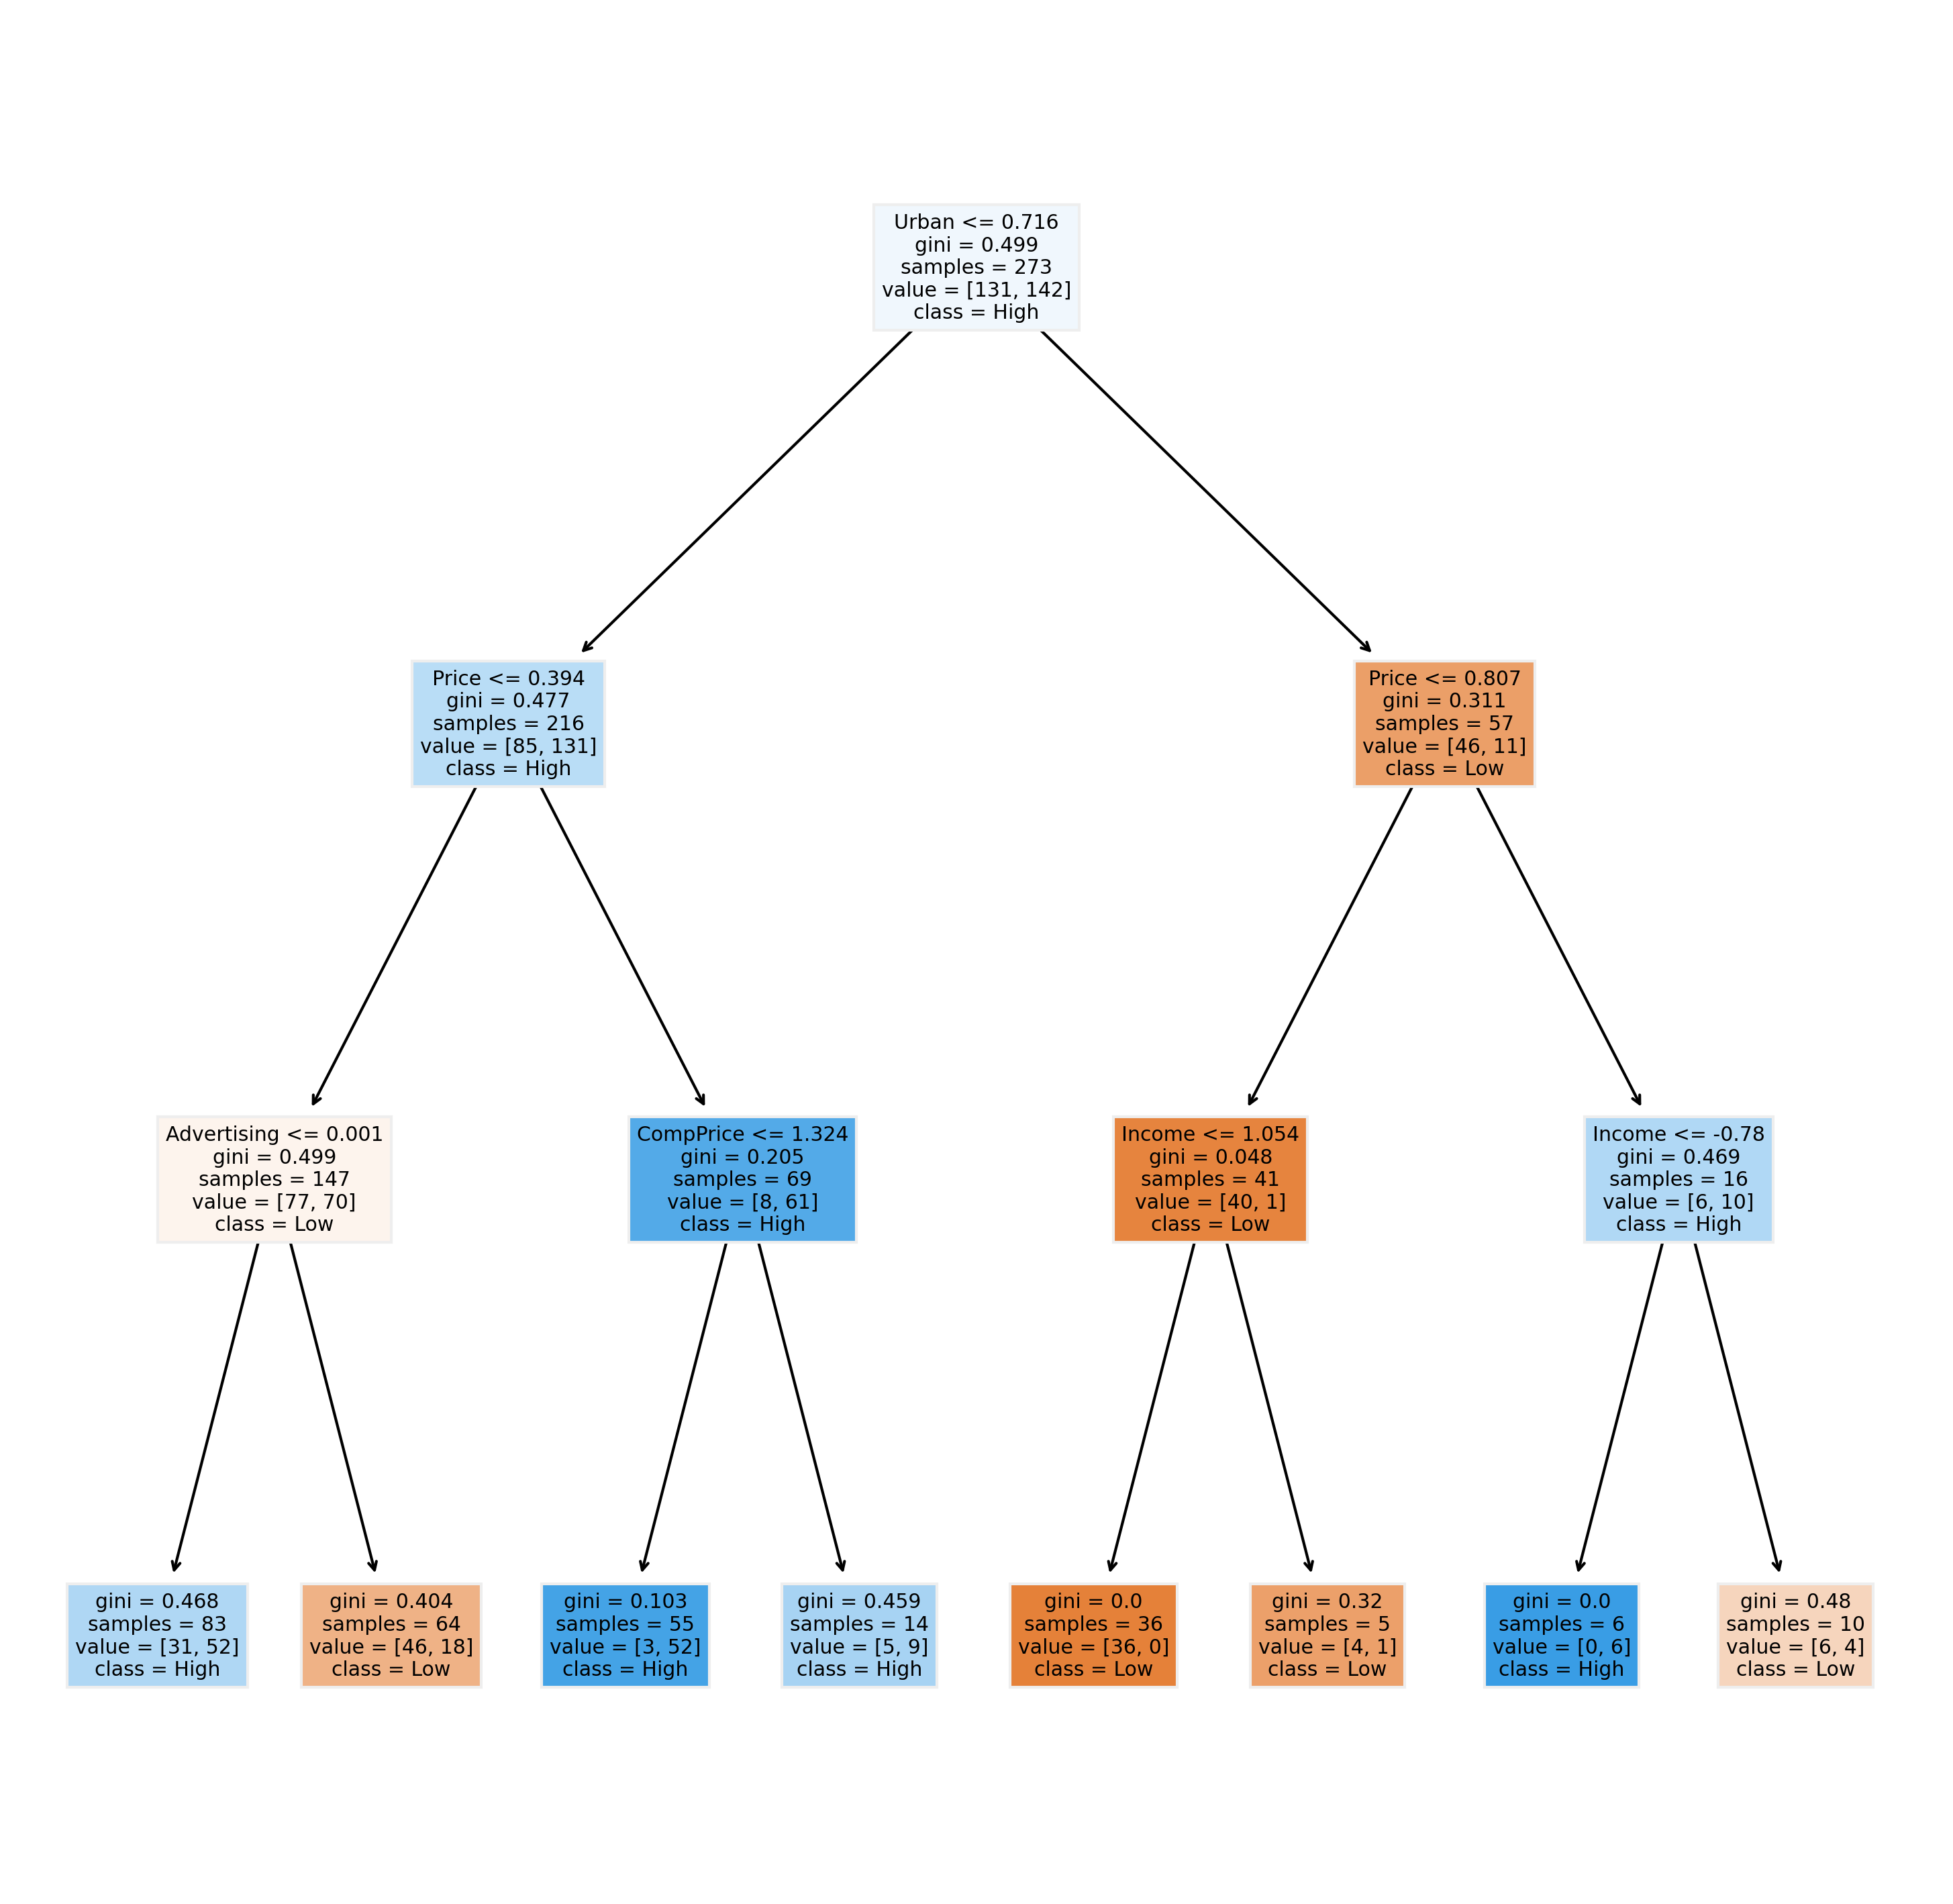

In [39]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(model_CART,feature_names = fn, class_names=cn,filled = True);

In [40]:
#Predicting on test data
pred = model_CART.predict(x_test_std) 
pd.Series(pred).value_counts()

1    65
0    53
dtype: int64

In [41]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), pred)

col_0,0,1
Sales,,
0,44,18
1,9,47


In [42]:
# Classification Report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        62
           1       0.72      0.84      0.78        56

    accuracy                           0.77       118
   macro avg       0.78      0.77      0.77       118
weighted avg       0.78      0.77      0.77       118



In [43]:
# Accuracy 
np.mean(pred==y_test.squeeze())

0.7711864406779662

## Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
model_reg = DecisionTreeRegressor(max_depth = 3, max_leaf_nodes=10)
model_reg.fit(x_train_std, y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10)

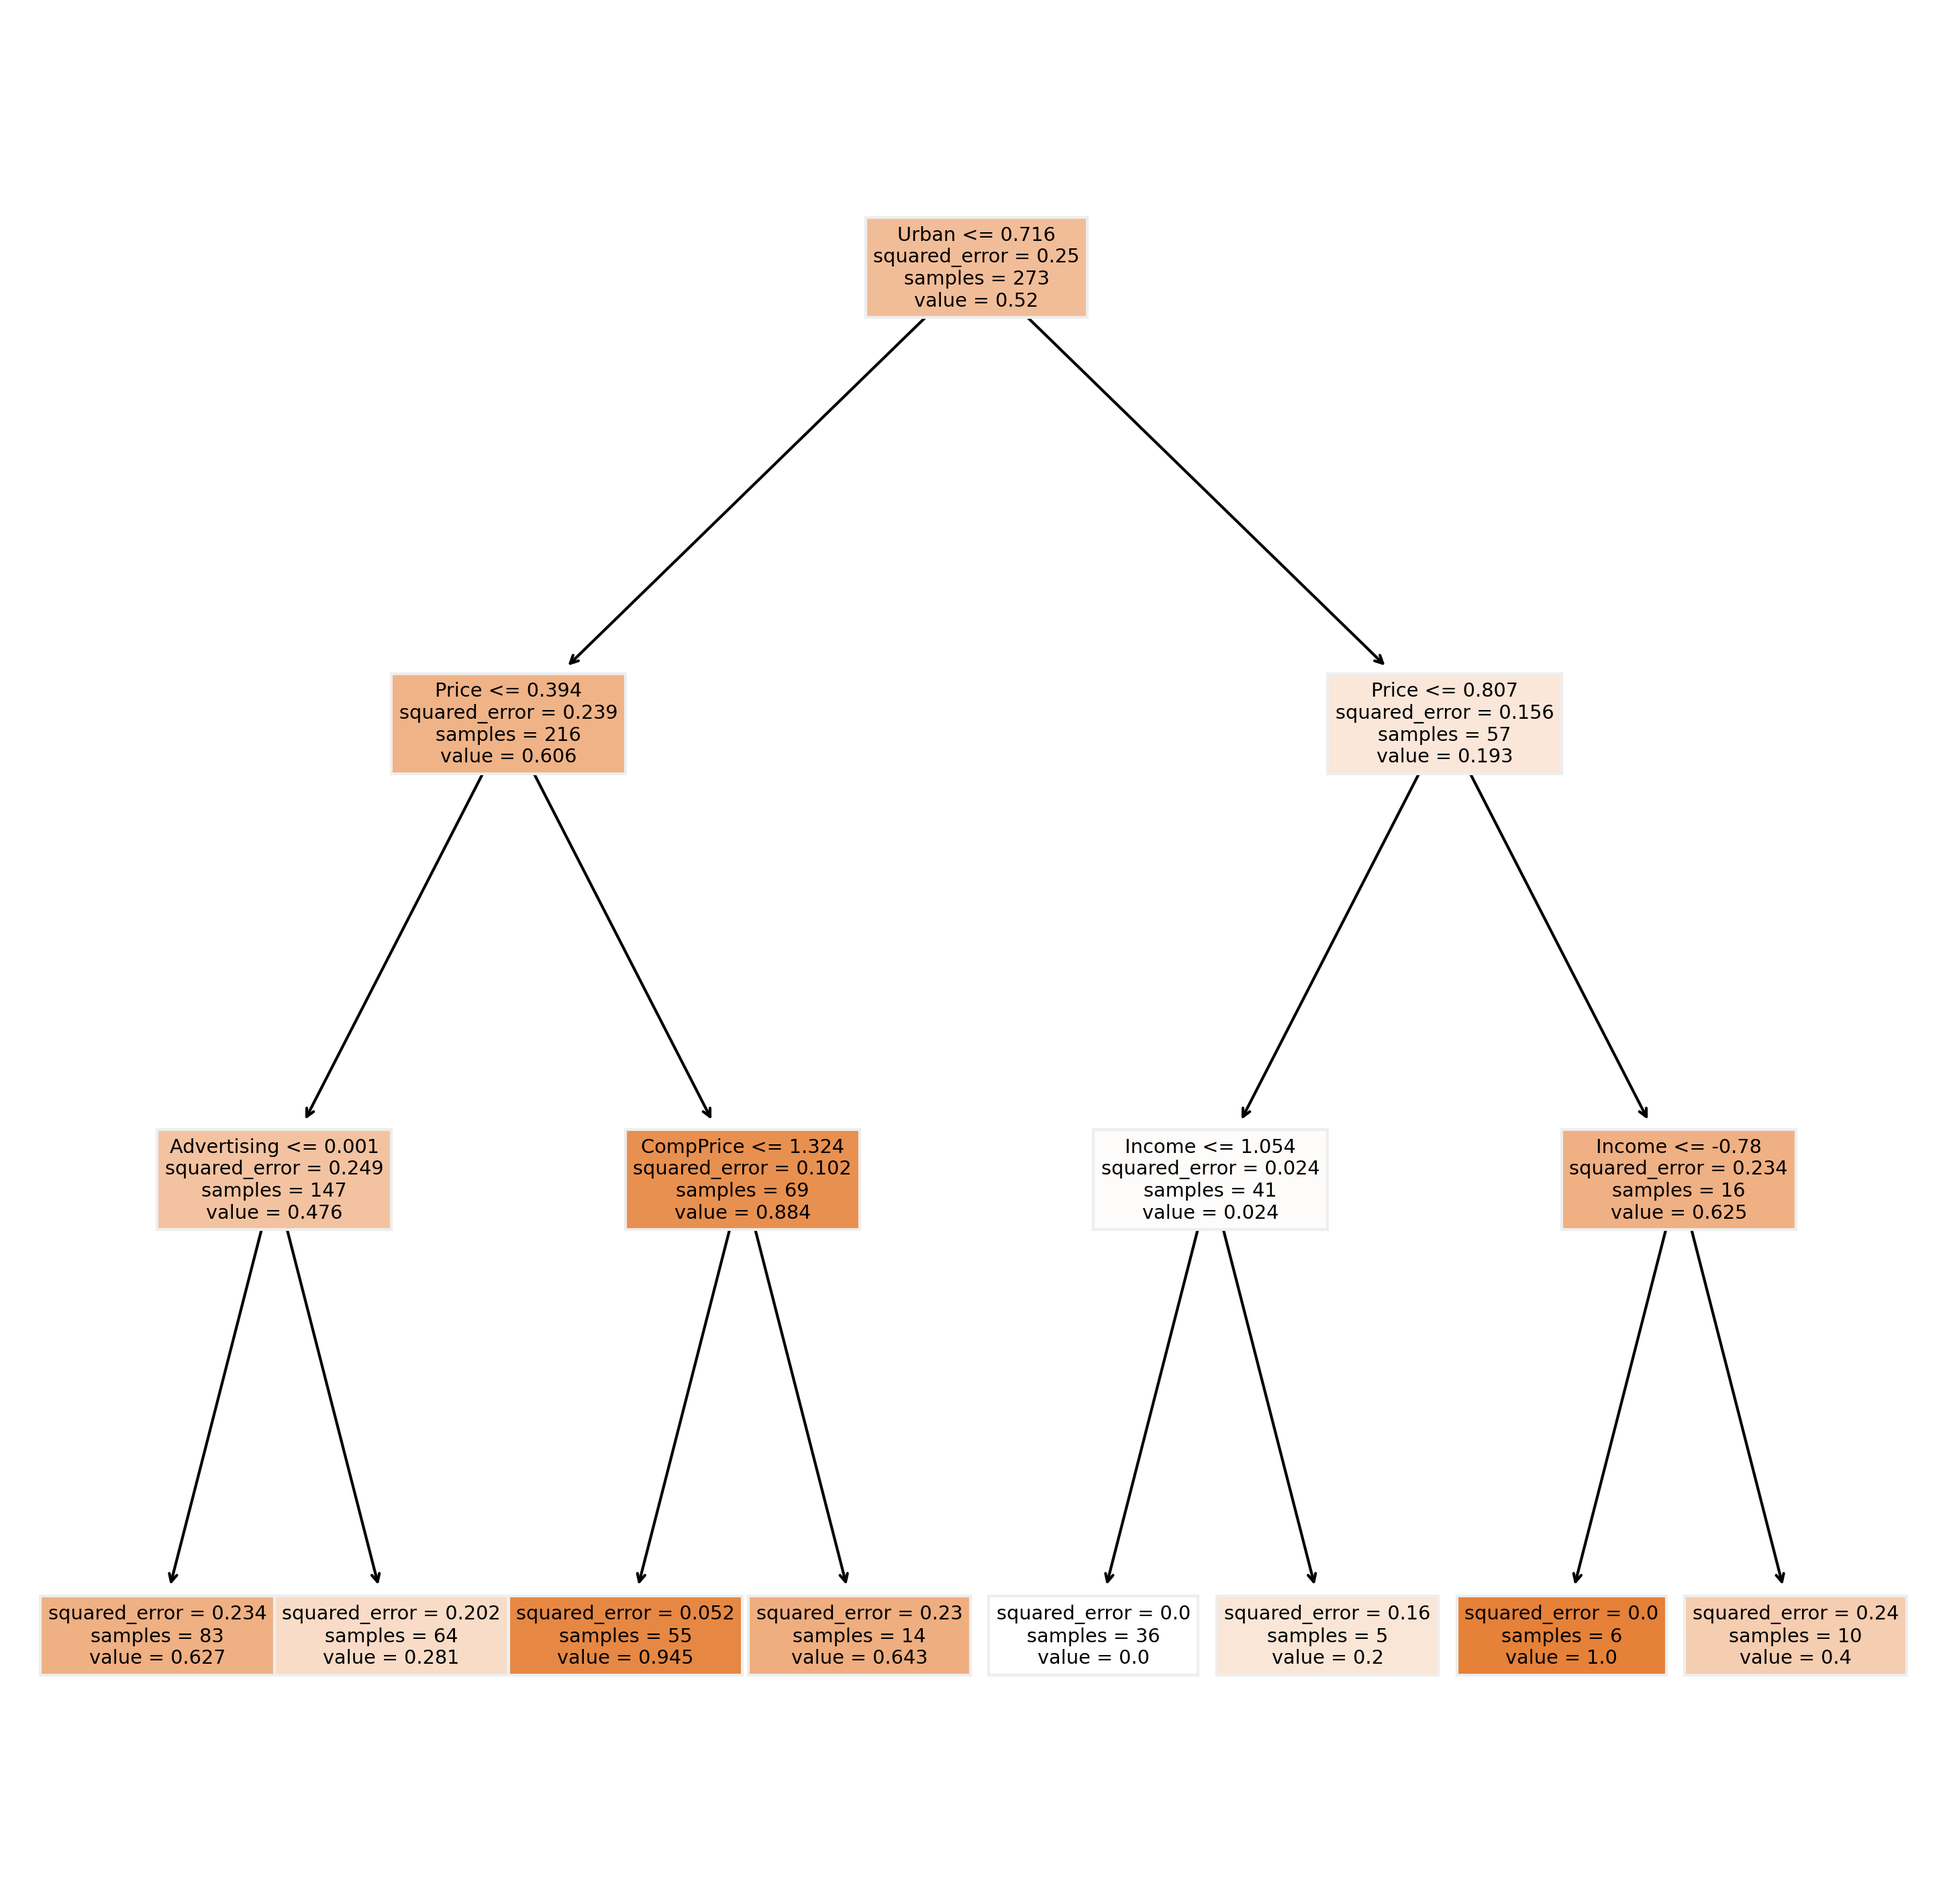

In [45]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(model_reg,feature_names = fn, class_names=cn,filled = True);

In [46]:
#Predicting on test data
pred_reg = model_CART.predict(x_test_std) 
pd.Series(pred_reg).value_counts()

1    65
0    53
dtype: int64

In [47]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), pred_reg)

col_0,0,1
Sales,,
0,44,18
1,9,47


In [48]:
# Classification Report
print(classification_report(y_test,pred_reg))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        62
           1       0.72      0.84      0.78        56

    accuracy                           0.77       118
   macro avg       0.78      0.77      0.77       118
weighted avg       0.78      0.77      0.77       118



In [49]:
# Accuracy 
np.mean(pred_reg==y_test.squeeze())

0.7711864406779662

### Prediction for new data using CART Model

In [50]:
model_CART.predict([[117,100,4,466,97,55,14,0,0,1,0,1,0,1]])

array([1])

## Conclusion
+ We have categorice the Sales in two category high and low
+ we have perform different value of depth and find that at max depth 3 the difference of train acuracy and test acuracy is low. 
+ we have compared the gini and entropy criterion for splitting the nodes of a decision tree
+ F1 score of both the criterion is same but the obtained results using the gini criterion are slightly better. 
+ When we build decissionTree Regression model it gives same accuracy as gini gives.